In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('optima.dat', sep='\t')

In [3]:
df.drop(df[df['Choice'] == -1].index, inplace=True)
car_not_available = df['CarAvail'] == 3
car_is_chosen = df['Choice'] == 1
incompatible = car_is_chosen & car_not_available
df.drop(df[incompatible].index, inplace=True)

In [4]:
df

,ID,DestAct,NbTransf,TimePT,WalkingTimePT,WaitingTimePT,CostPT,CostCar,TimeCar,NbHousehold,...,FreqTripHouseh,Region,distance_km,Choice,InVehicleTime,ModeToSchool,ReportedDuration,CoderegionCAR,age,Weight
0,10350017,2,4,85,23,10,12.4,3.17,32,2,...,4,1,30.0,1,52,3,255,1,27,0.000379
2,10350025,11,2,82,33,5,3.0,0.45,6,-1,...,2,1,4.5,0,44,-1,20,1,-1,0.000368
3,10350075,1,3,107,21,31,24.0,2.36,23,2,...,1,1,25.0,1,55,-1,30,1,63,0.000368
4,10350085,1,5,190,116,18,10.8,1.16,14,3,...,3,1,12.5,1,56,-1,20,1,57,0.000409
5,10350086,1,4,116,38,29,9.6,1.89,20,3,...,3,1,19.0,1,49,-1,30,1,58,0.000368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,96040531,1,4,148,28,69,10.4,3.92,40,5,...,3,7,42.0,1,51,5,35,7,37,0.000870
2261,96040537,8,0,139,116,0,14.4,3.18,43,5,...,3,7,32.0,1,23,5,70,7,46,0.000368
2262,96040537,8,0,71,57,0,6.0,0.94,12,5,...,3,7,9.0,1,14,5,20,7,46,0.000368
2263,96040538,11,2,118,70,10,11.4,1.77,24,5,...,4,7,17.5,1,38,3,30,7,49,0.000409


In [5]:
df['OccupStat'].value_counts()

OccupStat
 1    796
 2    451
 9    319
 6    100
-1     95
 8     81
 4     24
 3     19
 5      9
 7      5
Name: count, dtype: int64

In [6]:
(df['distance_km'] < 10).sum()

np.int64(514)

In [14]:
df['distance_km'].quantile(.90)

np.float64(97.0)

In [8]:
percent_below = (df["distance_km"] <= 20).mean()
percent_below

np.float64(0.5234333859926277)

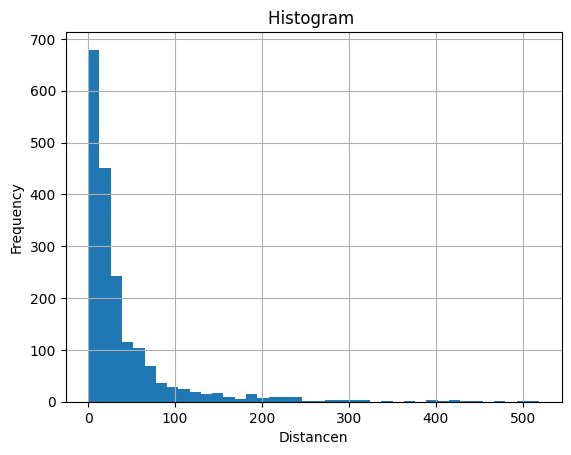

In [10]:
df["distance_km"].hist(bins=40)  # adjust bins as needed
plt.xlabel("Distancen")
plt.ylabel("Frequency")
plt.title("Histogram ")
plt.show()

In [27]:
zero_tt = df['TimePT'] == 0
print(zero_tt.sum())

7


ValueError: supplied range of [0.0, inf] is not finite

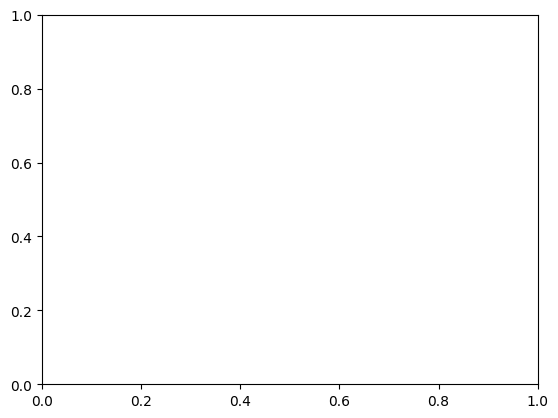

In [23]:
df['speed_PT'] = 60 * df['distance_km'] / df['TimePT']
df['speed_PT'].hist(bins=20)

In [18]:
short_distance = df[df["distance_km"] < 5]

<Axes: >

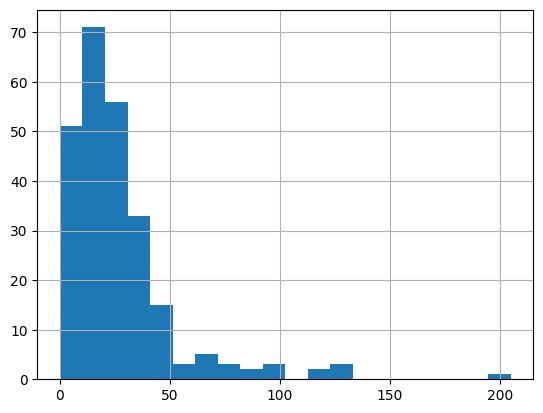

In [20]:
short_distance['TimePT'].hist(bins=20)